In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
EPOCHS = 20
BATCH_SIZE = 64

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
trainset = datasets.MNIST(
    root      = './.data/',
    train     = True,
    download  = True,
    transform = transform
)

testset = datasets.MNIST(
    root      = './.data/',
    train     = False,
    download  = True,
    transform = transform
)

In [ ]:
train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE
)

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

(224, 224, 3)


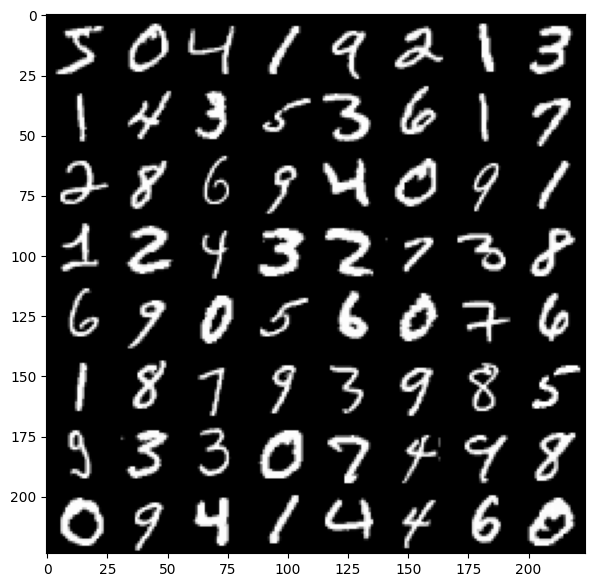

In [ ]:
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(7, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
print(np.transpose(npimg, (1,2,0)).shape)
plt.show()

In [ ]:
for i, label in enumerate(labels):
    print("{}".format(label.item()), end=' ')
    if i % 8 == 7:
        print()

5 0 4 1 9 2 1 3 
1 4 3 5 3 6 1 7 
2 8 6 9 4 0 9 1 
1 2 4 3 2 7 3 8 
6 9 0 5 6 0 7 6 
1 8 7 9 3 9 8 5 
9 3 3 0 7 4 9 8 
0 9 4 1 4 4 6 0 


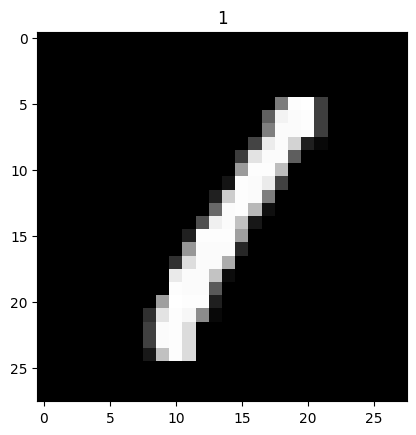

In [ ]:
idx = 3

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(labels[idx].item())
plt.imshow(item_npimg, cmap='gray')
plt.show()

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))

        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)

        return x

In [ ]:
model = Net().to(DEVICE)

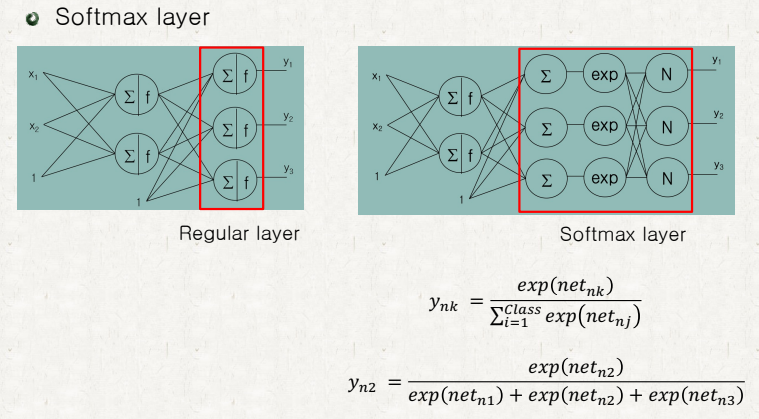

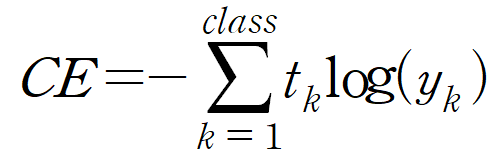

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma = 0.1)

In [ ]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            pred = output.max(dim=1)[1]
            correct += pred.eq(target).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

<ipython-input-51-35506cbad5a8>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


[1] Test Loss: 2.2993, Accuracy: 17.88%
[2] Test Loss: 2.2935, Accuracy: 30.31%
[3] Test Loss: 2.2779, Accuracy: 32.36%
[4] Test Loss: 2.2007, Accuracy: 32.88%
[5] Test Loss: 2.0422, Accuracy: 54.00%
[6] Test Loss: 1.8816, Accuracy: 64.39%
[7] Test Loss: 1.8067, Accuracy: 71.29%
[8] Test Loss: 1.7653, Accuracy: 73.48%
[9] Test Loss: 1.7418, Accuracy: 74.63%
[10] Test Loss: 1.7288, Accuracy: 75.31%
[11] Test Loss: 1.7210, Accuracy: 75.64%
[12] Test Loss: 1.7157, Accuracy: 75.87%
[13] Test Loss: 1.7119, Accuracy: 76.01%
[14] Test Loss: 1.7089, Accuracy: 76.15%
[15] Test Loss: 1.7065, Accuracy: 76.24%
[16] Test Loss: 1.7045, Accuracy: 76.31%
[17] Test Loss: 1.7029, Accuracy: 76.41%
[18] Test Loss: 1.7014, Accuracy: 76.48%
[19] Test Loss: 1.7002, Accuracy: 76.63%
[20] Test Loss: 1.6991, Accuracy: 76.72%


<ipython-input-51-35506cbad5a8>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


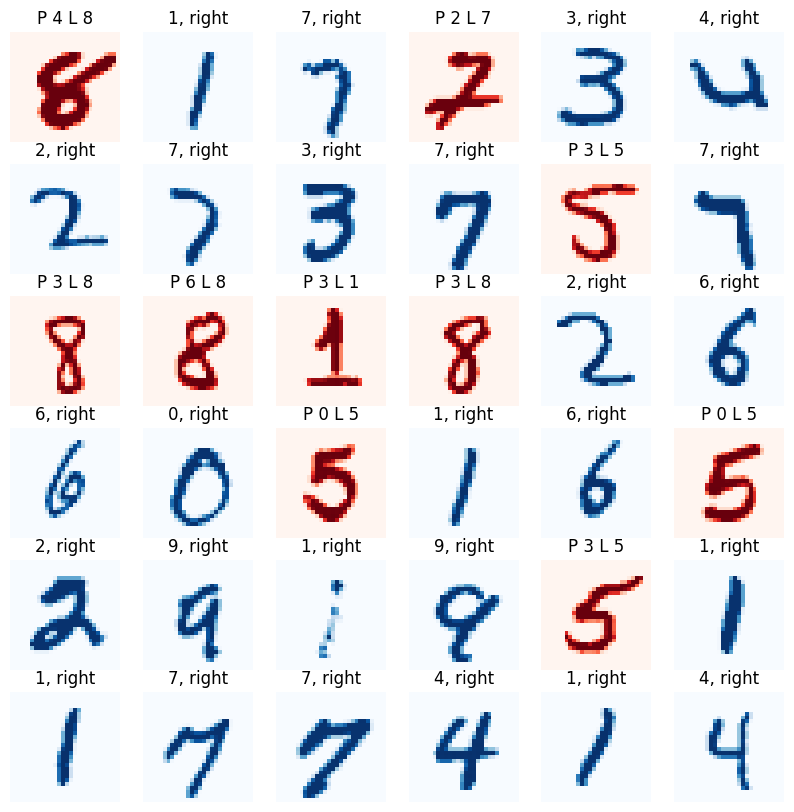

In [ ]:
columns = 6
rows = 6
fig = plt.figure(figsize=(10,10))

model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(testset))
    input_img = testset[data_idx][0].unsqueeze(dim=0).to(DEVICE)

    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = argmax.item()
    label = testset[data_idx][1]

    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(str(pred) + ', right')
        cmap = 'Blues'
    else:
        plt.title('P ' + str(pred) + ' L ' +  str(label))
        cmap = 'Reds'
    plot_img = testset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    plt.axis('off')

plt.show()

## 1) Weight Decay : optim.METHOD(weight_decay=1e-5)

 - [doc] (https://pytorch.org/docs/stable/optim.html)

 ![image.png](http://drive.google.com/uc?id=1g3tKDhXoVCMf1jgrKY9C6lh60UdHhxdg)

 ![image.png](http://drive.google.com/uc?id=1c20jINL4yCakDUDJGzVOGRqU1IjzwdIw)


In [ ]:
# Optimizer 설정
Lambda = 1e-5
optimizer = optim.SGD(model.parameters(), lr=LR, weight_decay=Lambda) # L2 Regularization

## 2) Batch Normalization : nn.BatchNorm1d


![image.png](http://drive.google.com/uc?id=1eYc8TFEtx-MsgdVGV1C4sKJNHh9GqObH)
- Internal Covariance Shift

 ![image.png](http://drive.google.com/uc?id=1425nKR9u1tNDmPDCU3M-BkkcMaYYoP1e)

- [doc] (https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)

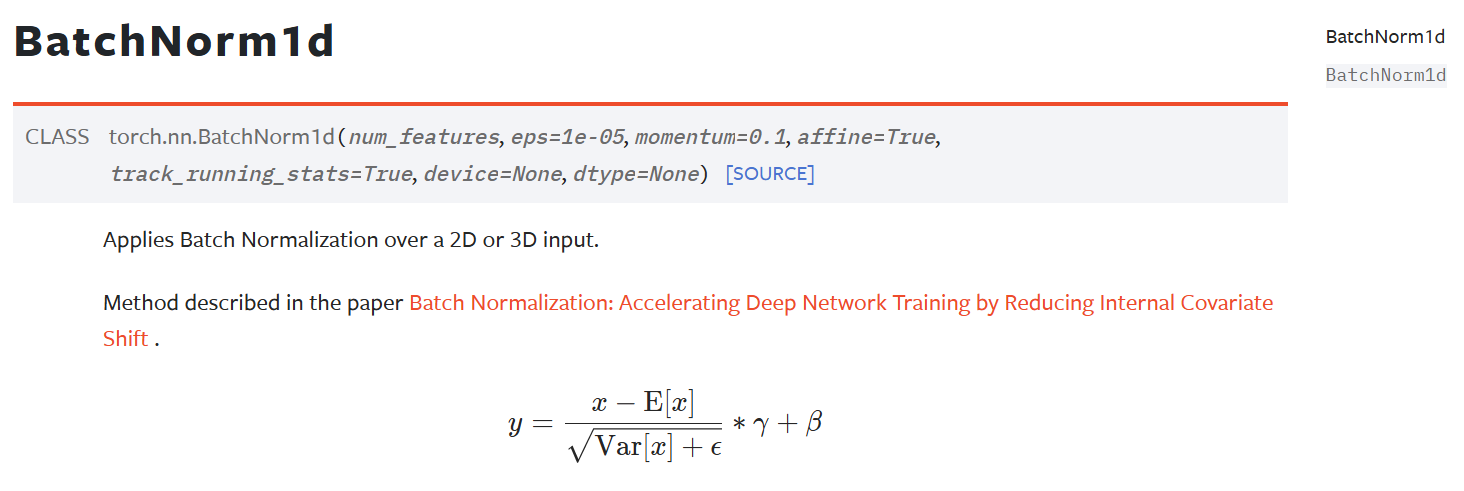


In [ ]:
# Model 설정
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(num_features=256) # When x is 2-dmin, nn.BatchNorm2d
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(num_features=128) # When x is 2-dmin, nn.BatchNorm2d
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

model = Net().to("cuda")
summary(model, (1, 28, 28))

## 3) Dropout : nn.Dropout

 - [doc] (https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
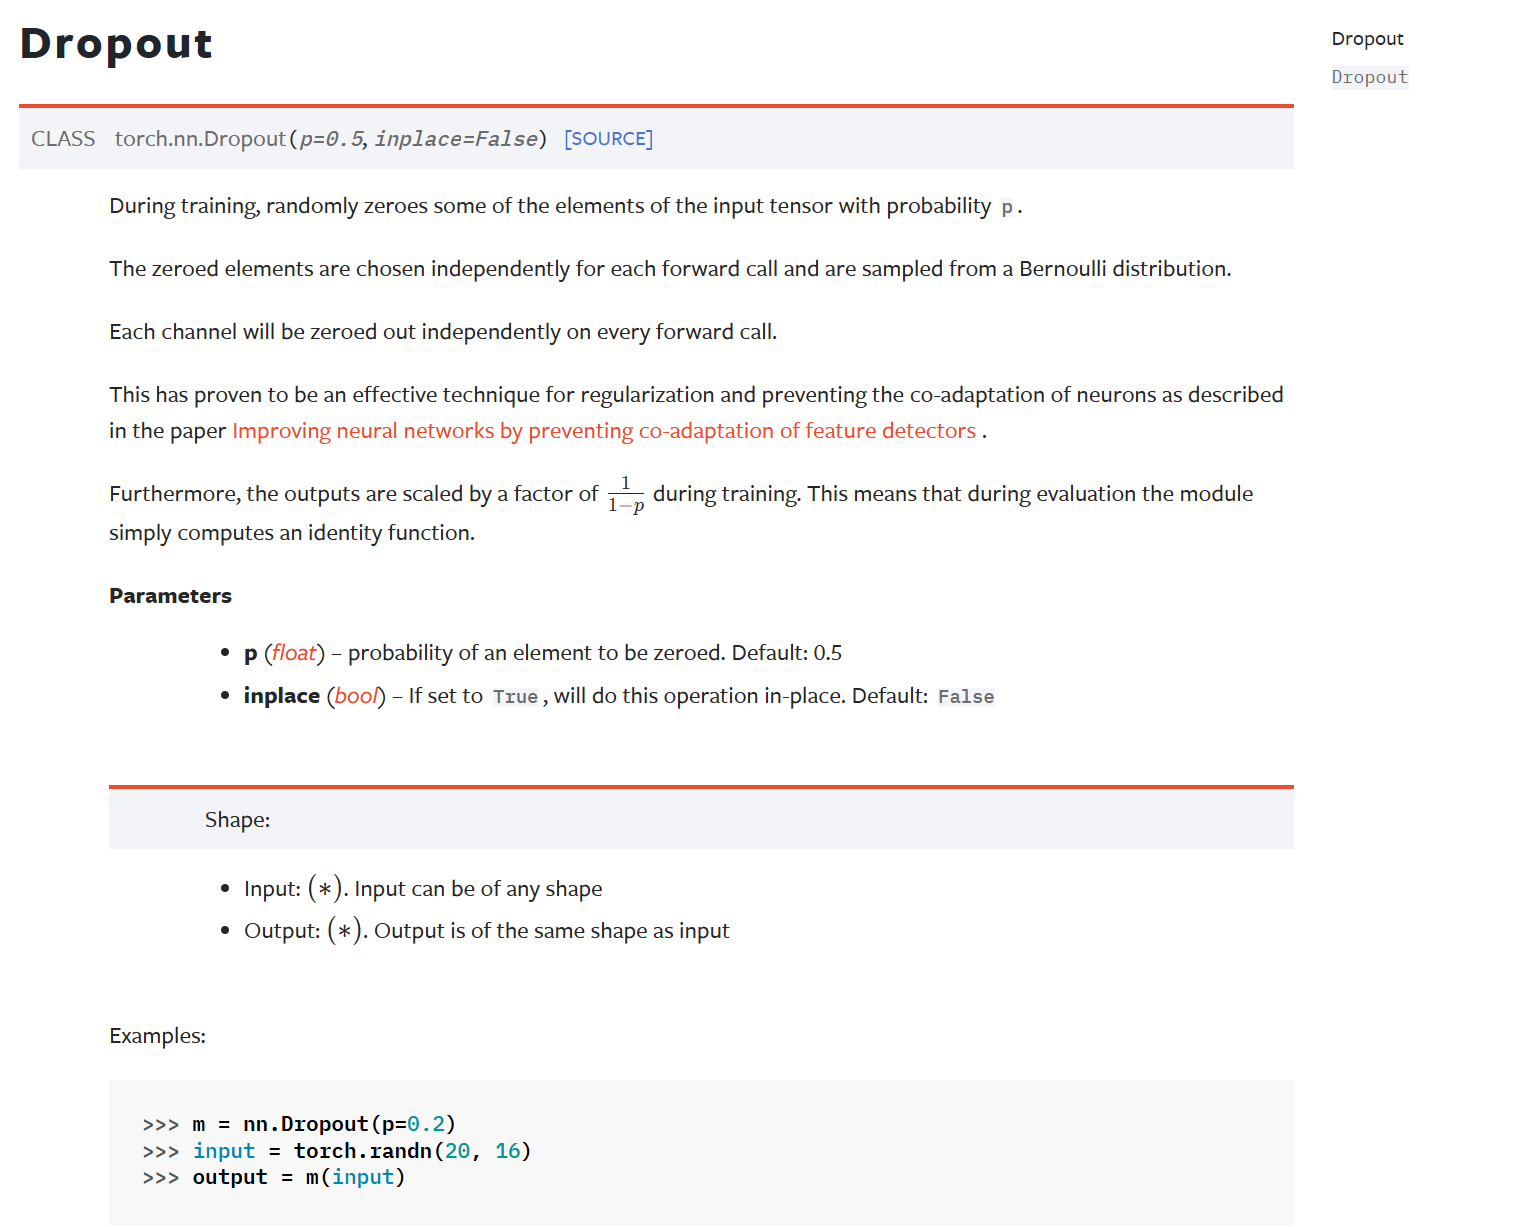

In [ ]:
# Model 설정
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dropout = nn.Dropout(p=0.5) # When x is 2-dmin,nn.Dropout2d
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256) # When x is 2-dmin,nn.BatchNorm2d
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128) # When x is 2-dmin,nn.BatchNorm2d
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.dropout(self.relu(self.bn1(self.fc1(x)))) # mode.train() vs model.eval()
        x = self.dropout(self.relu(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        return x